<a href="https://colab.research.google.com/github/YashviP/Computer-Vision-Playlist/blob/main/OpenCV/Histogram_Equalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A histogram of an image is the graphical interpretation of the image’s pixel intensity values.

Histogram Equalization  adjusts the contrast of an image using histogram. To enhance the image's contrast, it spreads out the most frequent pixel intensity values.

histogram equalization allows the image’s areas with lower contrast to gain a higher contrast


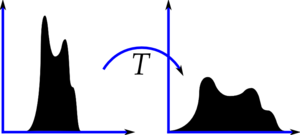

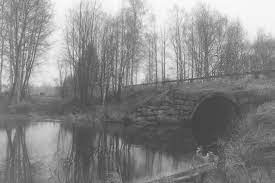

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

img = cv.imread("/content/hist-eq.jpeg",0)
cv2_imshow(img)

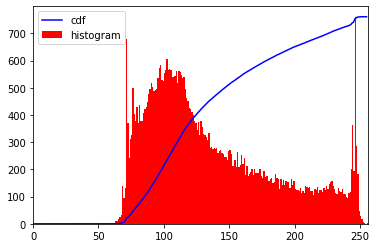

In [ ]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [ ]:
equ = cv.equalizeHist(img)

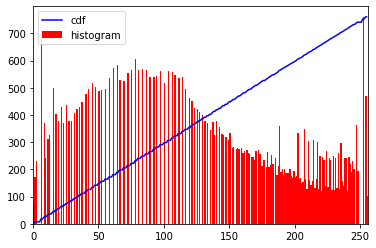

In [ ]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

cumulative distribution function (CDF) line is now linear as opposed to the original curved line.

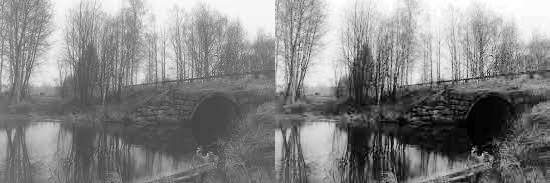

In [ ]:
res=np.hstack((img,equ))
cv2_imshow(res)

## Contrastive Limited Adaptive Equalization

using above equalisation technique we are doing global equalisation 

 **adaptive histogram equalization ( local equalisation )** -  
image is divided into small blocks called "tiles" (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization.

In [ ]:
import numpy as np
import cv2 as cv
img = cv.imread('/content/statue.jpg',0)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE()
cl1 = clahe.apply(img)

In [ ]:
statue_equ = cv.equalizeHist(img)

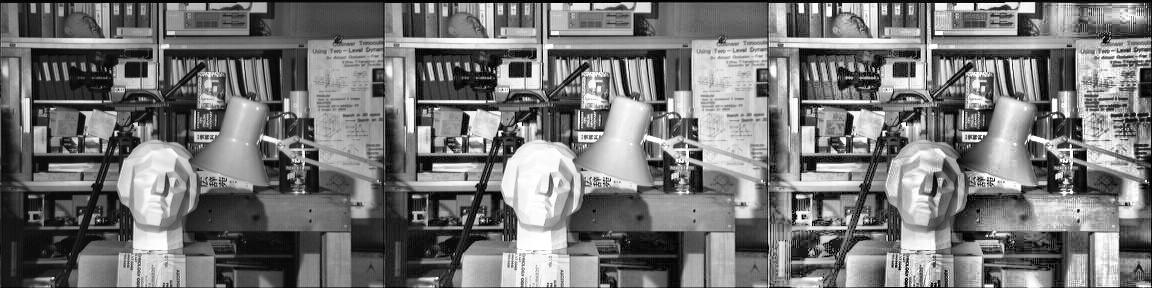

In [ ]:
res=np.hstack((img,statue_equ,cl1))
cv2_imshow(res)